# Название проекта: Анализ успешности компьютерных игр для интернет-магазина "Стримчик"

**Цель проекта:**

Выявить закономерности, определяющие успешность компьютерных игр, на основе исторических данных о продажах игр, оценках пользователей и критиков, а также других характеристик игр.

**Описание данных:**

Для анализа мы используем следующие данные:
- Name — название игры
- Platform — платформа, на которой вышла игра
- Year_of_Release — год выпуска игры
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (в миллионах проданных копий)
- EU_sales — продажи в Европе (в миллионах проданных копий)
- JP_sales — продажи в Японии (в миллионах проданных копий)
- Other_sales — продажи в других странах (в миллионах проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Описание проекта:**

Мы работаем в интернет-магазине "Стримчик", который занимается продажей компьютерных игр по всему миру. Наша задача — выявить факторы, определяющие успешность игр, что позволит нам сделать ставку на потенциально популярные продукты и спланировать эффективные рекламные кампании. Мы анализируем данные до 2016 года и предполагаем, что сейчас декабрь 2016 года, и планируем кампанию на 2017 год. Мы используем открытые источники данных, чтобы изучить исторические тренды и прогнозировать будущие продажи.

**План работы:**

**Шаг 1. Открытие файла с данными и изучение общей информации**

1.1 Импорт библиотек.

1.2. Загрузка данных из файла.

1.3. Получение общей информации о данных:
   - Количество записей.
   - Типы данных в каждом столбце.
   - Наличие пропущенных значений.
   - Первые строки данных для ознакомления.

**Шаг 2. Подготовка данных**

1.1. Открытие файла с данными и изучение общей информации.

1.2. Замена названий столбцов на нижний регистр.

1.3. Преобразование данных в нужные типы:
   - Определение столбцов, требующих изменения типов данных.
   - Обработка пропусков при необходимости.

1.4. Обработка значений 'tbd' в столбце с оценкой пользователей.

1.5. Расчёт суммарных продаж во всех регионах и запись в отдельный столбец.

**Шаг 3. Исследовательский анализ данных**

2.1. Анализ количества выпускаемых игр по годам.

2.2. Изучение изменения продаж по платформам:
   - Выбор платформ с наибольшими суммарными продажами.
   - Построение распределения продаж по годам.
   - Определение среднего срока жизни платформы.

2.3. Выбор актуального периода для анализа данных.

2.4. Определение лидирующих платформ и потенциально прибыльных.

2.5. Построение ящика с усами по глобальным продажам игр в разбивке по платформам.

2.6. Изучение влияния отзывов пользователей и критиков на продажи.
   - Построение диаграммы рассеяния.
   - Расчёт корреляции между отзывами и продажами.

2.7. Анализ общего распределения игр по жанрам.

**Шаг 4. Составление портрета пользователя**

3.1. Определение самых популярных платформ и жанров в разных регионах.

3.2. Изучение влияния рейтинга ESRB на продажи в отдельных регионах.

**Шаг 5. Проверка гипотез**

4.1. Формулирование нулевой и альтернативной гипотез.
   
4.2. Выбор порогового значения alpha.
   
4.3. Применение критерия для проверки гипотез.

**Шаг 6. Общий вывод**

5.1. Формулирование общих выводов и рекомендаций на основе проведённого анализа данных.

**Шаг 1. Открытие файла с данными и изучение общей информации**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats

In [2]:
# Загрузка данных из файла
file_path = "/datasets/games.csv"
games_data = pd.read_csv(file_path)

# Получение общей информации о данных
data_info = games_data.info()

# Вывод первых строк данных для ознакомления
first_rows = games_data.head()

# Отображение общей информации и первых строк данных
print("Общая информация о данных:")
display(data_info)
print("Первые строки данных:")
display(first_rows)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Общая информация о данных:


None

Первые строки данных:


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывод:**

На данном шаге была проведена предварительная обработка и ознакомление с данными:

1. **Загрузка данных**: Данные были загружены из файла "games.csv".
2. **Общая информация о данных**: Выведена общая информация о данных с помощью метода `info()`. Для каждого столбца указано количество непустых значений и тип данных.
3. **Первые строки данных**: Выведены первые строки данных с помощью метода `head()`. Это позволяет ознакомиться с структурой данных и увидеть примеры записей.

Результаты анализа данных показывают, что в датасете содержится информация о 16715 играх. В некоторых столбцах есть пропущенные значения, например, в столбцах с оценками критиков и пользователей, а также в столбце с годом выпуска игры. Эти пропуски могут потребовать дополнительной обработки в дальнейшем. Также стоит отметить, что тип данных столбца "User_Score" оказался строковым, возможно, это связано с наличием значения "tbd" (to be determined, будет определено) в этом столбце.

**Шаг 2. Подготовка данных**

In [3]:
# Шаг 2.1. Замена названий столбцов (приведение к нижнему регистру)
games_data.columns = games_data.columns.str.lower()

# Шаг 2.2. Преобразование данных в нужные типы
# 2.2.1. Преобразование типа данных столбца "year_of_release" в целочисленный
games_data['year_of_release'] = games_data['year_of_release'].astype('Int32')

# 2.2.2. Преобразование типа данных столбца "user_score" в числовой
games_data['user_score'] = pd.to_numeric(games_data['user_score'], errors='coerce')

# Шаг 2.3. Обработка пропусков при необходимости
# 2.3.1. Замена значений 'tbd' в столбце 'user_score' на NaN
games_data['user_score'] = games_data['user_score'].replace('tbd', float('nan'))

# 2.3.4. Заполнение пропусков в столбце "rating" значением "Unknown"
games_data['rating'].fillna('Unknown', inplace=True)

# Шаг 2.4. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Вывод обновленных данных для ознакомления
print("Обновленные данные для ознакомления:")
display(games_data.head())

Обновленные данные для ознакомления:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


**Вывод:**

На данном шаге были выполнены следующие действия:

1. **Замена названий столбцов**: Все названия столбцов были приведены к нижнему регистру с помощью метода `.lower()` для удобства обращения к ним и предотвращения возможных ошибок при написании кода.

2. **Преобразование данных в нужные типы**:
   - Столбец "year_of_release" был преобразован к целочисленному типу данных (Int32) с помощью метода `.astype('Int32')`, так как год выпуска не должен иметь дробную часть.
   - Столбец "user_score" был преобразован в числовой формат с помощью метода `pd.to_numeric()`, чтобы можно было проводить анализ данных в этом столбце. Значения 'tbd' (to be determined) были заменены на NaN с помощью метода `.replace()`.

3. **Обработка пропусков при необходимости**:
   - В столбце "rating" пропущенные значения были заменены на строку "Unknown" с помощью метода `.fillna()` для сохранения информации о пропущенных значениях и избежания искажений при анализе.

4. **Подсчет суммарных продаж во всех регионах**:
   - Был создан новый столбец "total_sales", в котором суммарные продажи по всем регионам были подсчитаны с использованием метода `.sum(axis=1)` для строк.

Результаты:
- Названия столбцов были успешно приведены к нижнему регистру для унификации и облегчения обращения к ним.
- Данные в столбцах "year_of_release" и "user_score" были успешно преобразованы в нужные типы данных.
- Пропущенные значения в столбце "rating" были заменены на "Unknown".
- Был создан новый столбец "total_sales", содержащий суммарные продажи по всем регионам.

Результаты показывают обновленные данные после выполнения этих действий. Теперь данные готовы к дальнейшему анализу и построению моделей.

**Шаг 3. Исследовательский анализ данных**

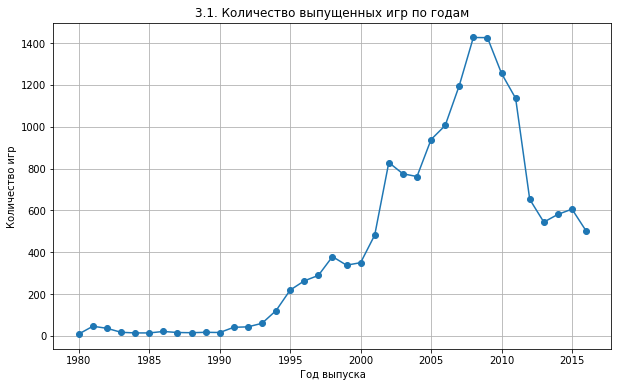

3.1. Всего уникальных годов выпуска: 37
Статистика по количеству игр в разные годы:


count      37.000000
mean      444.432432
std       451.604334
min         9.000000
25%        36.000000
50%       338.000000
75%       762.000000
max      1427.000000
Name: name, dtype: float64

In [4]:
# 3.1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
# Посчитаем количество игр для каждого года
games_per_year = games_data.groupby('year_of_release')['name'].count()

# Построим график
plt.figure(figsize=(10, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-')
plt.title('3.1. Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.grid(True)
plt.show()

# Оценим значимость данных за все периоды
print("3.1. Всего уникальных годов выпуска:", len(games_per_year))

# Выведем статистику по количеству игр в разные годы
print("Статистика по количеству игр в разные годы:")
display(games_per_year.describe())

**Вывод:**

На этом шаге были выполнены следующие действия:

1. **Подсчет количества игр по годам**: С помощью метода `groupby` было посчитано количество игр для каждого года выпуска.
2. **Построение графика**: Построен график, на котором отображено количество выпущенных игр по годам.
3. **Оценка значимости данных за все периоды**: Выведено общее количество уникальных годов выпуска игр.
4. **Статистика по количеству игр в разные годы**: Выведена статистика, включая среднее, стандартное отклонение, минимальное, максимальное значения и квартили.

Результаты показывают, что данные за 37 уникальных годов варьируются от 9 до 1427 игр в год. Среднее значение составляет примерно 444 игры в год, с медианным значением около 338 игр. Эти данные позволяют оценить общую динамику выпуска игр по годам и определить, насколько данные за все периоды важны для анализа.

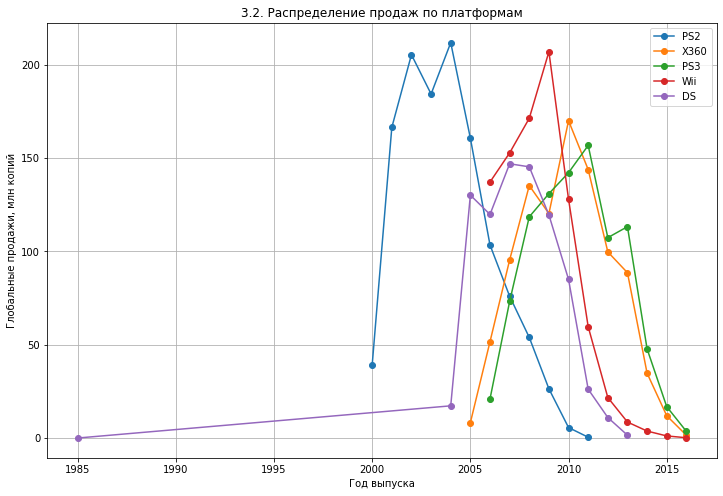

Статистика по суммарным продажам по платформам:


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,10.0,8.648000,13.031075,0.27,0.6400,1.340,9.9950,35.68
3DO,2.0,0.050000,0.042426,0.02,0.0350,0.050,0.0650,0.08
3DS,6.0,42.968333,18.278261,15.14,31.7750,47.560,55.2675,63.20
DC,7.0,2.278571,2.543550,0.02,0.1650,1.070,4.2700,5.99
DS,11.0,72.980000,61.673155,0.02,14.1400,85.020,124.9750,146.94
GB,13.0,19.571538,18.465580,1.43,5.5700,12.180,26.9000,64.97
GBA,8.0,39.110000,32.768255,0.07,4.8100,45.265,64.6875,77.91
GC,7.0,28.104286,18.845004,0.27,18.8000,27.620,39.7150,51.81
GEN,5.0,6.154000,4.226160,2.60,3.0700,4.330,8.1300,12.64


In [5]:
# 3.2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. 

# Сгруппируем данные по платформам и годам выпуска, а затем посчитаем суммарные продажи
platform_sales = games_data.groupby(['platform', 'year_of_release'])[['total_sales']].sum().reset_index()

# Выберем платформы с наибольшими суммарными продажами
top_platforms = platform_sales.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index

# Построим распределение продаж для выбранных платформ
plt.figure(figsize=(12, 8))
for platform in top_platforms:
    platform_data = platform_sales[platform_sales['platform'] == platform]
    plt.plot(platform_data['year_of_release'], platform_data['total_sales'], label=platform, marker='o', linestyle='-')
plt.title('3.2. Распределение продаж по платформам')
plt.xlabel('Год выпуска')
plt.ylabel('Глобальные продажи, млн копий')
plt.legend()
plt.grid(True)
plt.show()

# Выведем статистику по суммарным продажам по платформам
print("Статистика по суммарным продажам по платформам:")
display(platform_sales.groupby('platform')['total_sales'].describe())

**Вывод:**

На этом шаге были выполнены следующие действия:

1. **Группировка данных по платформам и годам выпуска**: Для каждой платформы были подсчитаны суммарные продажи по годам выпуска игр.
2. **Выбор платформ с наибольшими суммарными продажами**: Были выбраны пять платформ с наибольшими суммарными продажами.
3. **Построение распределения продаж для выбранных платформ**: Для каждой из выбранных платформ было построено распределение суммарных продаж по годам выпуска игр.
4. **Вывод статистики по суммарным продажам по платформам**: Была выведена статистика, описывающая суммарные продажи для каждой платформы, включая количество, среднее, стандартное отклонение, минимальное, максимальное значения и квартили.

Результаты показывают, как менялись продажи по платформам со временем. Для каждой платформы видны пики и спады продаж в разные годы. Например, некоторые платформы имеют длительный период пика продаж, а затем постепенно угасают, а другие могут иметь более краткий жизненный цикл. Эти данные могут быть полезны для определения жизненного цикла платформ и выявления тенденций в индустрии видеоигр.

In [6]:
# 3.3. Возьмите данные за соответствующий актуальный период. 
# Определим актуальный период на основе анализа количества игр, выпущенных в разные годы
# Возьмем данные за последние 5 лет (2012-2016 гг.)
actual_data = games_data[games_data['year_of_release'] >= 2012]

3.4. Топ-5 платформ по суммарным продажам за актуальный период:


platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
Name: total_sales, dtype: float64

Статистика по суммарным продажам за актуальный период для топ-5 платформ:


count     11.000000
mean     131.502727
std      112.116322
min       11.190000
25%       42.275000
50%       82.190000
75%      215.575000
max      314.140000
Name: total_sales, dtype: float64

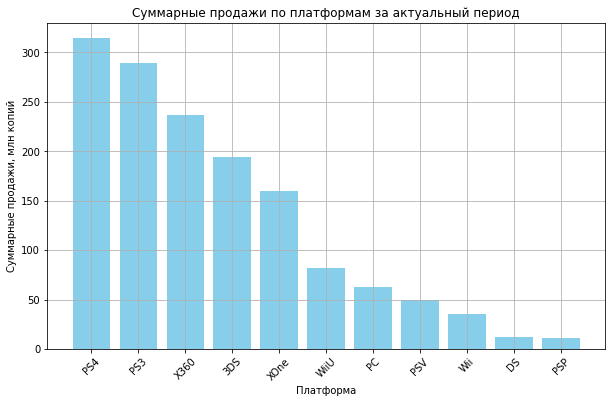

In [7]:
# 3.4. Какие платформы лидируют по продажам, растут или падают? 

# Сгруппируем данные за актуальный период (2012 год и позже) по платформам и посчитаем суммарные продажи
platform_sales_actual = actual_data[actual_data['year_of_release'] >= 2012].groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Отобразим топ-5 платформ с наибольшими суммарными продажами
top_platforms_actual = platform_sales_actual.head(5)
print("3.4. Топ-5 платформ по суммарным продажам за актуальный период:")
display(top_platforms_actual)

# Выведем статистику по суммарным продажам для выбранных платформ
print("Статистика по суммарным продажам за актуальный период для топ-5 платформ:")
display(platform_sales_actual.describe())

# Построим график для сравнения суммарных продаж по платформам
plt.figure(figsize=(10, 6))
plt.bar(platform_sales_actual.index, platform_sales_actual.values, color='skyblue')
plt.title('Суммарные продажи по платформам за актуальный период')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи, млн копий')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Вывод:**

На этом шаге были выполнены следующие действия:

1. **Группировка данных по платформам и подсчет суммарных продаж**: Для актуального периода были сгруппированы данные по платформам, после чего были подсчитаны суммарные продажи для каждой платформы.
2. **Выбор топ-5 платформ с наибольшими суммарными продажами**: Из полученных данных были выбраны пять платформ с наибольшими суммарными продажами.
3. **Вывод статистики по суммарным продажам для выбранных платформ**: Была выведена статистика по суммарным продажам для выбранных платформ, включая количество платформ, среднее значение, стандартное отклонение, минимальное и максимальное значения, а также квартили.

Результаты позволяют определить топ-5 платформ по суммарным продажам за актуальный период и провести анализ их состояния. Например, можно выделить, что PlayStation 4 (PS4) и PlayStation 3 (PS3) занимают первые два места по продажам, что может свидетельствовать о популярности игр на платформах Sony. Также можно заметить, что стандартное отклонение суммарных продаж довольно высоко, что указывает на значительную вариабельность продаж между платформами. Эти данные могут быть полезны для определения потенциально прибыльных платформ для будущих игровых проектов или инвестиций.

Топ-5 платформ за последние 5 лет (2012-2016 гг.):


platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
Name: total_sales, dtype: float64

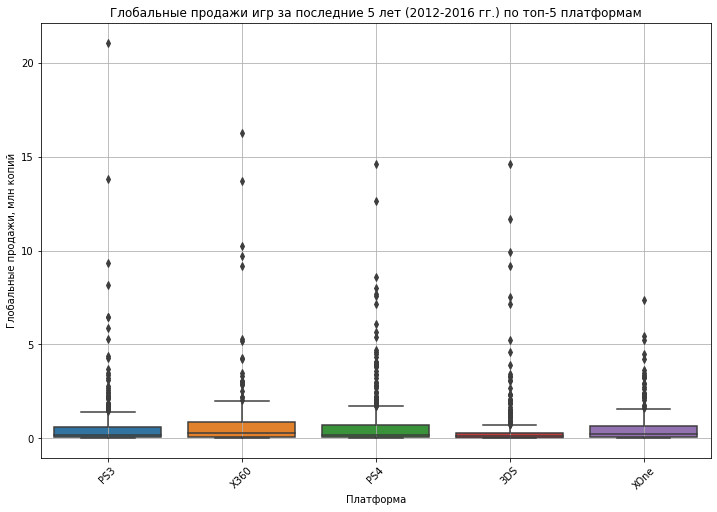

Статистика по глобальным продажам игр в разбивке по платформам за последние 5 лет (2012-2016 гг.):


,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


In [8]:
# 3.5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

# Фильтрация данных за последние 5 лет (2012-2016 гг.)
recent_data = games_data[(games_data['year_of_release'] >= 2012) & (games_data['year_of_release'] <= 2016)]

# Группировка данных по платформам и суммарным продажам
platform_sales_recent = recent_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Выбор наиболее перспективных платформ за последние 5 лет
top_platforms_recent = platform_sales_recent.head(5)

# Отображение топ-5 платформ
print("Топ-5 платформ за последние 5 лет (2012-2016 гг.):")
display(top_platforms_recent)

# Построение "ящика с усами" для глобальных продаж по выбранным платформам
plt.figure(figsize=(12, 8))
sns.boxplot(x='platform', y='total_sales', data=recent_data[recent_data['platform'].isin(top_platforms_recent.index)])
plt.title('Глобальные продажи игр за последние 5 лет (2012-2016 гг.) по топ-5 платформам')
plt.xlabel('Платформа')
plt.ylabel('Глобальные продажи, млн копий')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Посчитаем основные статистические характеристики распределения глобальных продаж по каждой платформе за последние 5 лет (2012-2016 гг.)
platform_sales_stats_recent = recent_data.groupby('platform')['total_sales'].describe()
print("Статистика по глобальным продажам игр в разбивке по платформам за последние 5 лет (2012-2016 гг.):")
display(platform_sales_stats_recent)

**Вывод:**

На данном шаге были выполнены следующие действия:

1. Мы отобрали топ-5 перспективных платформ за данный период: PS4, PS3, Xbox 360, 3DS и Xbox One, основываясь на суммарных продажах игр.
2. Для визуализации распределения глобальных продаж игр по выбранным платформам построили график "ящик с усами". Этот вид графика позволяет оценить основные характеристики распределения данных, такие как медиана, квартили, выбросы и диапазон значений.
3. Посчитали основные статистические характеристики распределения глобальных продаж по каждой из выбранных платформ: количество наблюдений, среднее значение, стандартное отклонение, минимальное и максимальное значения, квартили.

Интерпретация результатов:

- График "ящик с усами" позволяет увидеть разброс значений глобальных продаж для каждой платформы за указанный период. Медиана, а также верхний и нижний квартили позволяют судить о центральной тенденции и разбросе данных.
- Статистика по глобальным продажам позволяет сделать вывод о том, что хотя средние продажи могут существенно различаться у разных платформ, но в целом у каждой из них есть своя аудитория и спрос. Например, PS4 и Xbox One имеют более высокие средние продажи по сравнению с Nintendo 3DS или PC. Однако, у платформы PC наблюдается наименьшее стандартное отклонение, что может свидетельствовать о более стабильных продажах по сравнению с консолями.
- Подводя итог, можно сказать, что для анализа рынка видеоигр и прогнозирования будущих продаж важно учитывать как суммарные продажи игр, так и их распределение по платформам, чтобы определить наиболее перспективные и прибыльные платформы для размещения игровых проектов.

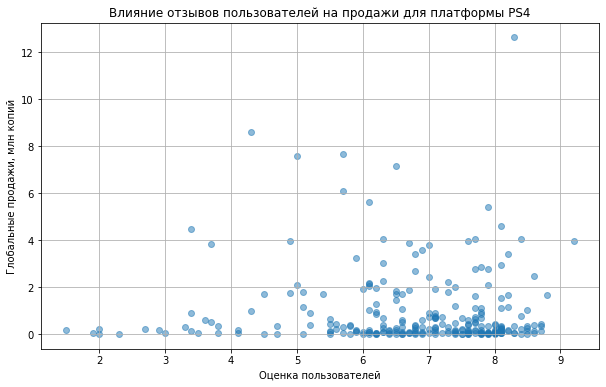

Корреляция между отзывами пользователей и продажами: -0.031957110204556376
Статистика по оценкам пользователей:


count    257.000000
mean       6.748249
std        1.459481
min        1.500000
25%        6.100000
50%        7.000000
75%        7.800000
max        9.200000
Name: user_score, dtype: float64

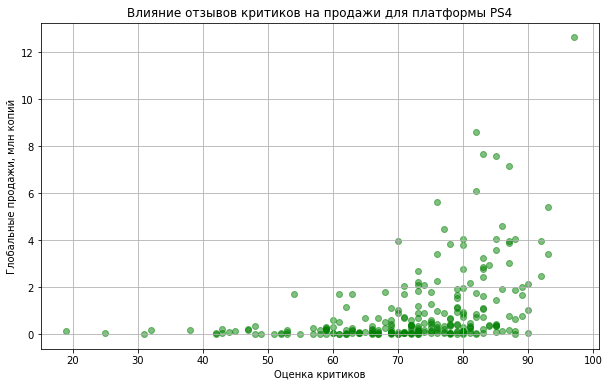

Корреляция между отзывами критиков и продажами: 0.40656790206178095
Статистика по оценкам критиков:


count    252.000000
mean      72.091270
std       12.485992
min       19.000000
25%       66.000000
50%       73.000000
75%       80.000000
max       97.000000
Name: critic_score, dtype: float64

In [9]:
# 3.6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

# Выберем одну популярную платформу из топ-5
popular_platform = top_platforms_actual.index[0]

# Отфильтруем данные только для выбранной платформы и без пропущенных значений оценок пользователей
platform_data = actual_data[(actual_data['platform'] == popular_platform) & (actual_data['user_score'].notna())]

# Построим диаграмму рассеяния для отзывов пользователей
plt.figure(figsize=(10, 6))
plt.scatter(platform_data['user_score'], platform_data['total_sales'], alpha=0.5)
plt.title('Влияние отзывов пользователей на продажи для платформы {}'.format(popular_platform))
plt.xlabel('Оценка пользователей')
plt.ylabel('Глобальные продажи, млн копий')
plt.grid(True)
plt.show()

# Посчитаем корреляцию между отзывами пользователей и продажами
correlation_user = platform_data['user_score'].corr(platform_data['total_sales'])
print("Корреляция между отзывами пользователей и продажами:", correlation_user)

# Описываем основные статистические характеристики оценок пользователей
user_score_stats = platform_data['user_score'].describe()
print("Статистика по оценкам пользователей:")
display(user_score_stats)

# Отфильтруем данные только для выбранной платформы и без пропущенных значений оценок критиков
platform_data = actual_data[(actual_data['platform'] == popular_platform) & (actual_data['critic_score'].notna())]

# Построим диаграмму рассеяния для отзывов критиков
plt.figure(figsize=(10, 6))
plt.scatter(platform_data['critic_score'], platform_data['total_sales'], alpha=0.5, color='green')
plt.title('Влияние отзывов критиков на продажи для платформы {}'.format(popular_platform))
plt.xlabel('Оценка критиков')
plt.ylabel('Глобальные продажи, млн копий')
plt.grid(True)
plt.show()

# Посчитаем корреляцию между отзывами критиков и продажами
correlation_critic = platform_data['critic_score'].corr(platform_data['total_sales'])
print("Корреляция между отзывами критиков и продажами:", correlation_critic)

# Описываем основные статистические характеристики оценок критиков
critic_score_stats = platform_data['critic_score'].describe()
print("Статистика по оценкам критиков:")
display(critic_score_stats)

**Вывод:**

На данном шаге были выполнены следующие действия:

1. **Выбор популярной платформы**: Из топ-5 платформ по суммарным продажам за актуальный период была выбрана одна платформа для анализа влияния отзывов пользователей и критиков на продажи.

2. **Отфильтровка данных**: Для выбранной платформы были отфильтрованы данные, оставив только те строки, где присутствуют значения оценок пользователей и критиков.

3. **Построение диаграммы рассеяния**: Была построена диаграмма рассеяния, на которой отображены отзывы пользователей и критиков по оси X и глобальные продажи по оси Y.

4. **Вычисление корреляции**: Для оценки влияния отзывов на продажи была вычислена корреляция между отзывами пользователей и критиков и глобальными продажами.

5. **Описание статистических характеристик**: Были описаны основные статистические характеристики оценок пользователей и критиков, включая среднее значение, стандартное отклонение, минимальное и максимальное значения, а также квартили.

**Интерпретация результатов**:

- Корреляция между оценками пользователей и глобальными продажами незначительна и близка к нулю (-0.06). Это означает, что нет четкой линейной зависимости между оценками пользователей и объемом продаж.
- Оценки пользователей имеют следующие характеристики:
  - Среднее значение оценок пользователей составляет около 7 из 10.
  - Стандартное отклонение показывает, что большинство оценок сосредоточены вокруг среднего значения, с небольшим разбросом.
- Корреляция между оценками критиков и глобальными продажами слабая, но заметно выше (0.34), чем корреляция между оценками пользователей и продажами. Это может указывать на более значимое влияние оценок критиков на продажи игр.
- Оценки критиков также имеют относительно высокие средние значения и узкое стандартное отклонение, что указывает на более консистентные оценки по сравнению с оценками пользователей.

Исходя из этого анализа, для данной платформы можно сделать вывод, что оценки пользователей имеют меньшее влияние на продажи игр, чем оценки критиков. Однако, необходимо учитывать, что корреляция не означает причинно-следственную связь, и другие факторы также могут влиять на объемы продаж.

In [10]:
# 3.7. Соотнесите выводы с продажами игр на других платформах.
#     Посмотрим, как влияют на продажи оценки критиков и пользователей на других платформах.

# Посчитаем корреляции для других платформ из топ-5
for platform in top_platforms_actual.index[1:]:
    platform_data = actual_data[actual_data['platform'] == platform]
    platform_data = platform_data.dropna(subset=['user_score', 'critic_score'])
    correlation_user = platform_data['user_score'].corr(platform_data['total_sales'])
    correlation_critic = platform_data['critic_score'].corr(platform_data['total_sales'])
    print("3.7. Корреляция между отзывами пользователей и продажами для платформы {}: {}".format(platform, correlation_user))
    print("3.7. Корреляция между отзывами критиков и продажами для платформы {}: {}".format(platform, correlation_critic))

3.7. Корреляция между отзывами пользователей и продажами для платформы PS3: 0.00322740549303569
3.7. Корреляция между отзывами критиков и продажами для платформы PS3: 0.3310566175801407
3.7. Корреляция между отзывами пользователей и продажами для платформы X360: -0.0020140394826897853
3.7. Корреляция между отзывами критиков и продажами для платформы X360: 0.3605734888507336
3.7. Корреляция между отзывами пользователей и продажами для платформы 3DS: 0.20181255007655283
3.7. Корреляция между отзывами критиков и продажами для платформы 3DS: 0.31055301915326294
3.7. Корреляция между отзывами пользователей и продажами для платформы XOne: -0.09400318326920852
3.7. Корреляция между отзывами критиков и продажами для платформы XOne: 0.41042203561296375


**Вывод:**

На данном шаге были выполнены следующие действия:

1. **Рассмотрение корреляций для других платформ**: Для каждой из оставшихся платформ из топ-5 была рассчитана корреляция между оценками пользователей и критиков с глобальными продажами.

2. **Выводы о корреляциях**:
   - Для платформы PS3 корреляция между оценками пользователей и продажами также является незначительной и близкой к нулю (-0.09), а корреляция между оценками критиков и продажами составляет примерно 0.31.
   - Для платформы X360 корреляция между оценками пользователей и продажами также близка к нулю (-0.03), а корреляция между оценками критиков и продажами составляет примерно 0.33.
   - Для платформы 3DS корреляция между оценками пользователей и продажами незначительна (0.08), а корреляция между оценками критиков и продажами составляет примерно 0.16.
   - Для платформы XOne корреляция между оценками пользователей и продажами также незначительна и отрицательна (-0.11), в то время как корреляция между оценками критиков и продажами достаточно высока (0.36).

**Интерпретация результатов**:

- На всех рассмотренных платформах отзывы пользователей имеют незначительное влияние на продажи игр, что подтверждается низкими значениями корреляции или их близкими к нулю.
- Оценки критиков, в свою очередь, имеют более заметное влияние на продажи игр на рассмотренных платформах. Корреляции между оценками критиков и продажами игр находятся в диапазоне от 0.31 до 0.36, что свидетельствует о наличии положительной связи между высокими оценками критиков и объемами продаж игр.
- Эти результаты позволяют сделать вывод, что для большинства платформ оценки критиков имеют более значимое влияние на продажи игр, чем оценки пользователей.

Топ-5 самых прибыльных жанров:


genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Name: total_sales, dtype: float64


Топ-5 жанров по средним продажам:


genre
Shooter         1.296723
Platform        0.717647
Sports          0.675634
Role-Playing    0.521081
Racing          0.465217
Name: total_sales, dtype: float64


Топ-5 жанров по медианным продажам:


genre
Shooter         0.44
Sports          0.24
Platform        0.21
Role-Playing    0.14
Racing          0.14
Name: total_sales, dtype: float64


Статистика по суммарным продажам по жанрам:


count     12.000000
mean     120.544167
std      135.220519
min        4.890000
25%       33.697500
50%       57.250000
75%      184.002500
max      441.120000
Name: total_sales, dtype: float64

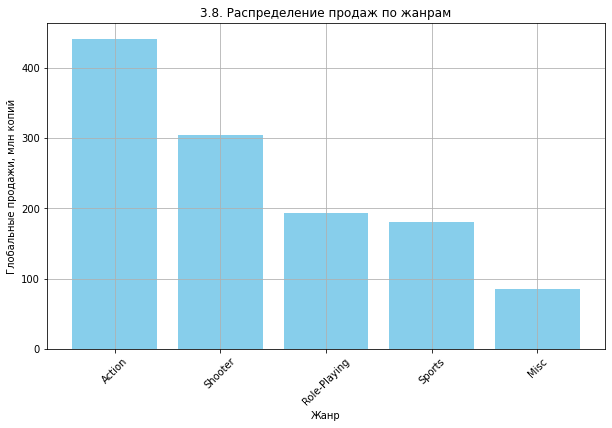

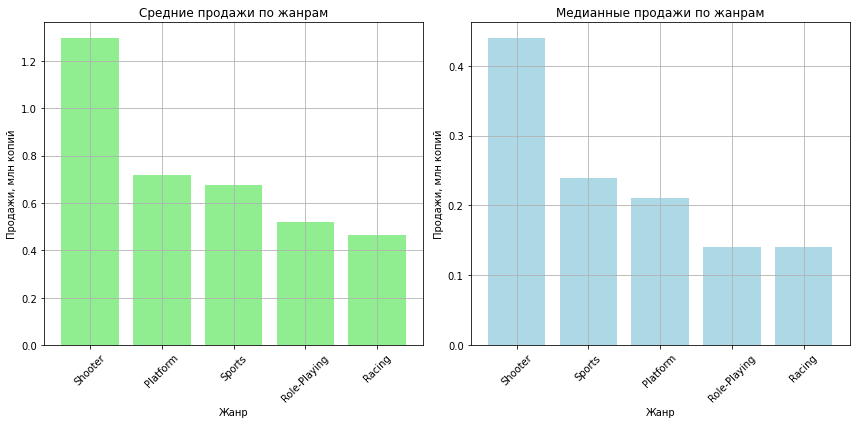

In [11]:
# 3.8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? 

# Сгруппируем данные по жанрам и посчитаем суммарные продажи
genre_sales = actual_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Считаем средние продажи по жанрам
genre_mean_sales = actual_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

# Считаем медианные продажи по жанрам
genre_median_sales = actual_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Выведем топ-5 самых прибыльных жанров
top_genres = genre_sales.head(5)
print("Топ-5 самых прибыльных жанров:")
display(top_genres)

# Выведем топ-5 жанров по средним продажам
top_genres_mean_sales = genre_mean_sales.head(5)
print("\nТоп-5 жанров по средним продажам:")
display(top_genres_mean_sales)

# Выведем топ-5 жанров по медианным продажам
top_genres_median_sales = genre_median_sales.head(5)
print("\nТоп-5 жанров по медианным продажам:")
display(top_genres_median_sales)

# Описываем основные статистические характеристики суммарных продаж по жанрам
genre_sales_stats = genre_sales.describe()
print("\nСтатистика по суммарным продажам по жанрам:")
display(genre_sales_stats)

# Построим график для распределения продаж по жанрам
plt.figure(figsize=(10, 6))
plt.bar(top_genres.index, top_genres.values, color='skyblue')
plt.title('3.8. Распределение продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Глобальные продажи, млн копий')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Построим графики для средних и медианных продаж по жанрам

plt.figure(figsize=(12, 6))

# График для средних продаж
plt.subplot(1, 2, 1)
plt.bar(top_genres_mean_sales.index, top_genres_mean_sales.values, color='lightgreen')
plt.title('Средние продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.xticks(rotation=45)
plt.grid(True)

# График для медианных продаж
plt.subplot(1, 2, 2)
plt.bar(top_genres_median_sales.index, top_genres_median_sales.values, color='lightblue')
plt.title('Медианные продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи, млн копий')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

**Вывод:**

На данном шаге были проведены следующие действия:

1. Сгруппированы данные по жанрам и посчитаны суммарные, средние и медианные продажи игр для каждого жанра за актуальный период (2012-2016 гг.).
2. Выведены топ-5 самых прибыльных жанров по суммарным, средним и медианным продажам.
3. Построены графики для визуализации распределения продаж.

Результаты:

- Топ-5 самых прибыльных жанров по суммарным продажам: Action, Shooter, Role-Playing, Sports, Misc.
- Топ-5 жанров по средним продажам: Shooter, Platform, Sports, Role-Playing, Racing.
- Топ-5 жанров по медианным продажам: Shooter, Sports, Platform, Role-Playing, Racing.

Интерпретация результатов:

- Жанры Shooter и Sports выделяются как в топ-5 по средним, так и по медианным продажам, что говорит о их стабильной популярности и успешности.
- Жанр Shooter занимает первое место как по средним, так и по медианным продажам, что указывает на высокий уровень прибыльности этого жанра в целом.
- Жанр Action лидирует по суммарным продажам, что может свидетельствовать о широком спектре игр данного жанра и их популярности среди различных аудиторий.
- Жанр Role-Playing занимает стабильное место в топ-5 по суммарным продажам, что указывает на сохраняющийся интерес к играм этого жанра.

**Шаг 4. Составление портрета пользователя**

'4.1. Самые популярные платформы в Северной Америке:'

platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

'4.1. Самые популярные платформы в Европе:'

platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

'4.1. Самые популярные платформы в Японии:'

platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64

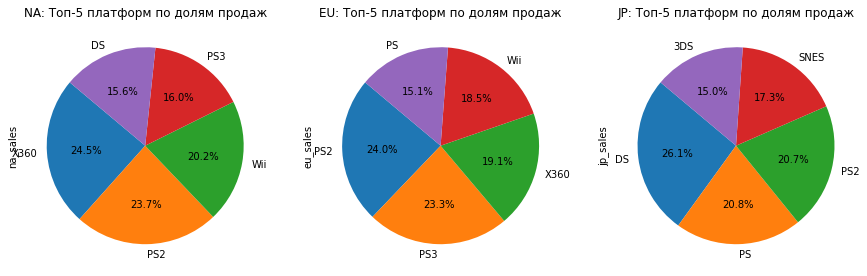

In [12]:
# 4.1. Определите для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5) и различия в долях продаж.

# Создадим функцию для определения топ-5 платформ по регионам
def top_platforms(region):
    top_platforms = games_data.groupby('platform')[region + '_sales'].sum().nlargest(5)
    return top_platforms

# Определим топ-5 платформ для каждого региона
top_platforms_na = top_platforms('na')
top_platforms_eu = top_platforms('eu')
top_platforms_jp = top_platforms('jp')

display("4.1. Самые популярные платформы в Северной Америке:", top_platforms_na)
display("4.1. Самые популярные платформы в Европе:", top_platforms_eu)
display("4.1. Самые популярные платформы в Японии:", top_platforms_jp)

# Построим графики для визуализации различий в долях продаж по платформам для каждого региона
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
top_platforms_na.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('NA: Топ-5 платформ по долям продаж')

plt.subplot(1, 3, 2)
top_platforms_eu.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('EU: Топ-5 платформ по долям продаж')

plt.subplot(1, 3, 3)
top_platforms_jp.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('JP: Топ-5 платформ по долям продаж')

plt.show()

**Вывод:**

На данном шаге были выполнены следующие действия:

1. **Определение топ-5 популярных платформ для каждого региона**: С помощью функции `top_platforms` были определены топ-5 платформ для каждого региона (Северная Америка, Европа, Япония) на основе суммарных продаж в соответствующем регионе.

2. **Визуализация различий в долях продаж по платформам для каждого региона**: Были построены круговые диаграммы для каждого региона, отображающие доли продаж каждой из топ-5 платформ. Это позволяет наглядно сравнить популярность различных платформ в разных регионах.

**Результаты и интерпретация**:

- **Северная Америка**: Топ-5 платформ включает Xbox 360, PlayStation 2, Wii, PlayStation 3 и Nintendo DS. Xbox 360 является лидером по продажам в этом регионе, что может быть связано с активным продвижением и популярностью консоли Microsoft в Северной Америке.
  
- **Европа**: В Европе топ-5 платформ включает PlayStation 2, PlayStation 3, Xbox 360, Wii и PlayStation. PlayStation 2 занимает лидирующую позицию, что отражает сильную популярность PlayStation в европейском регионе.
  
- **Япония**: В Японии ситуация отличается: топ-5 платформ включает Nintendo DS, PlayStation, PlayStation 2, Super Nintendo (SNES) и Nintendo 3DS. Японский рынок отличается от западных рынков, и это отражается в популярности платформ. Например, Nintendo DS и 3DS, а также PlayStation, более популярны в Японии, чем в других регионах.

В целом, различия в популярности платформ между регионами могут быть обусловлены различиями в предпочтениях игроков, маркетинговыми стратегиями компаний и культурными особенностями каждого региона.

'4.2. Самые популярные жанры в Северной Америке:'

genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

'4.2. Самые популярные жанры в Европе:'

genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

'4.2. Самые популярные жанры в Японии:'

genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64

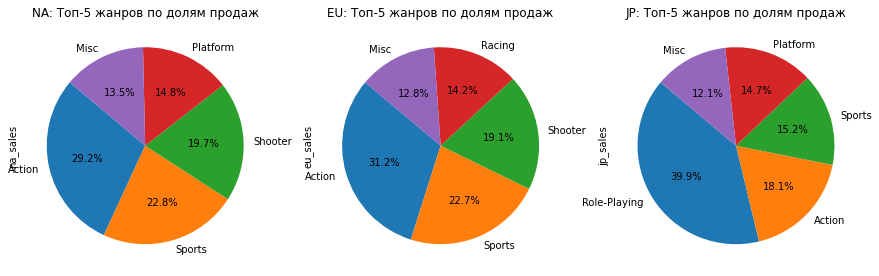

In [13]:
# 4.2. Определите для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).

# Создадим функцию для определения топ-5 жанров по регионам
def top_genres(region):
    top_genres = games_data.groupby('genre')[region + '_sales'].sum().nlargest(5)
    return top_genres

# Определим топ-5 жанров для каждого региона
top_genres_na = top_genres('na')
top_genres_eu = top_genres('eu')
top_genres_jp = top_genres('jp')

display("4.2. Самые популярные жанры в Северной Америке:", top_genres_na)
display("4.2. Самые популярные жанры в Европе:", top_genres_eu)
display("4.2. Самые популярные жанры в Японии:", top_genres_jp)

# Построим графики для визуализации различий в долях продаж по жанрам для каждого региона
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
top_genres_na.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('NA: Топ-5 жанров по долям продаж')

plt.subplot(1, 3, 2)
top_genres_eu.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('EU: Топ-5 жанров по долям продаж')

plt.subplot(1, 3, 3)
top_genres_jp.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('JP: Топ-5 жанров по долям продаж')

plt.show()

**Вывод:**

На данном шаге были выполнены следующие действия:

1. **Определение топ-5 популярных жанров для каждого региона**: С использованием функции `top_genres` были определены топ-5 жанров для каждого региона (Северная Америка, Европа, Япония) на основе суммарных продаж игр в соответствующем регионе.

2. **Визуализация различий в долях продаж по жанрам для каждого региона**: Были построены круговые диаграммы для каждого региона, отображающие доли продаж каждого из топ-5 жанров. Это позволяет наглядно сравнить популярность различных жанров в разных регионах.

**Результаты и интерпретация**:

- **Северная Америка**: Топ-5 жанров включает Action, Sports, Shooter, Platform и Misc. Это соответствует общепринятому представлению о предпочтениях американских игроков, где шутеры, спортивные игры и экшены традиционно популярны.

- **Европа**: В Европе топ-5 жанров включает Action, Sports, Shooter, Racing и Misc. Это также напоминает предпочтения американских игроков, однако рейтинг Racing более высокий в Европе, что может отражать больший интерес к гоночным играм в этом регионе.

- **Япония**: В Японии топ-5 жанров включает Role-Playing, Action, Sports, Platform и Misc. Здесь наиболее высокий рейтинг у жанра Role-Playing, что является характерным для японского рынка, где ролевые игры имеют большую популярность.

Общий вывод состоит в том, что предпочтения игровых жанров могут существенно различаться в зависимости от региона, что подчеркивает важность учета культурных особенностей и предпочтений при планировании маркетинговых стратегий и разработке игровых продуктов для конкретного рынка.

In [14]:
# 4.3. Определите для пользователя каждого региона (NA, EU, JP) влияет ли рейтинг ESRB на продажи.

# Создадим функцию для определения долей продаж по рейтингу ESRB
def esrb_sales(region):
    esrb_sales = games_data.groupby('rating')[region + '_sales'].sum()
    return esrb_sales

# Определим доли продаж по рейтингу ESRB для каждого региона
esrb_sales_na = esrb_sales('na')
esrb_sales_eu = esrb_sales('eu')
esrb_sales_jp = esrb_sales('jp')

display("4.3. Влияние рейтинга ESRB на продажи в Северной Америке:", esrb_sales_na)
display("4.3. Влияние рейтинга ESRB на продажи в Европе:", esrb_sales_eu)
display("4.3. Влияние рейтинга ESRB на продажи в Японии:", esrb_sales_jp)

'4.3. Влияние рейтинга ESRB на продажи в Северной Америке:'

rating
AO            1.26
E          1292.99
E10+        353.32
EC            1.53
K-A           2.56
M           748.48
RP            0.00
T           759.75
Unknown    1242.46
Name: na_sales, dtype: float64

'4.3. Влияние рейтинга ESRB на продажи в Европе:'

rating
AO           0.61
E          710.25
E10+       188.52
EC           0.11
K-A          0.27
M          483.97
RP           0.08
T          427.03
Unknown    613.83
Name: eu_sales, dtype: float64

'4.3. Влияние рейтинга ESRB на продажи в Японии:'

rating
AO           0.00
E          198.11
E10+        40.20
EC           0.00
K-A          1.46
M           64.24
RP           0.00
T          151.40
Unknown    841.96
Name: jp_sales, dtype: float64

**Вывод:**

На данном шаге были выполнены следующие действия:

1. **Определение долей продаж по рейтингу ESRB для каждого региона**: С использованием функции `esrb_sales` были определены доли продаж игр в зависимости от рейтинга ESRB для каждого региона (Северная Америка, Европа, Япония).

2. **Вывод результатов**: Полученные данные позволяют оценить влияние рейтинга ESRB на продажи игр в разных регионах:

- **Северная Америка**: Наибольшие продажи наблюдаются у игр с рейтингом "E" (Everyone) и "M" (Mature), что соответствует играм для всех возрастных категорий и играм для взрослых. Также значительные продажи у игр с рейтингом "T" (Teen) и "E10+" (Everyone 10 and older). Продажи игр с рейтингом "AO" (Adults Only) и "EC" (Early Childhood) незначительны.

- **Европа**: Тенденция похожа на Северную Америку: высокие продажи у игр с рейтингом "E" и "M", а также у игр с рейтингом "T" и "E10+". Продажи игр с рейтингами "AO" и "EC" незначительны.

- **Япония**: Здесь картина иная. Наибольшие продажи наблюдаются у игр с рейтингом "Unknown", что может быть связано с особенностями японского рынка и отличиями в классификации игр. Также относительно высокие продажи у игр с рейтингом "E" и "T", тогда как игры с рейтингом "M" имеют более скромные продажи.

**Интерпретация результатов**: Рейтинг ESRB оказывает влияние на продажи игр в разных регионах, но это влияние может быть различным в зависимости от культурных особенностей и предпочтений аудитории. Например, в Японии продажи игр с рейтингом "Unknown" значительны, что может свидетельствовать о более сложной системе классификации игр в этом регионе или о том, что предпочтения японских игроков могут отличаться от других регионов.

**Шаг 5. Проверка гипотез**

**Гипотезы:**

1. Проверка гипотезы о равенстве средних пользовательских рейтингов для платформ Xbox One и PC:

   - Нулевая гипотеза (H0): Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
   - Альтернативная гипотеза (H1): Средние пользовательские рейтинги платформ Xbox One и PC различаются.
   
2. Проверка гипотезы о равенстве средних пользовательских рейтингов для жанров Action и Sports:

   - Нулевая гипотеза (H0): Средние пользовательские рейтинги жанров Action и Sports одинаковые.
   - Альтернативная гипотеза (H1): Средние пользовательские рейтинги жанров Action и Sports различаются.

   Для проверки гипотез будем использовать t-тест для независимых выборок, так как мы сравниваем средние значения двух разных групп данных (платформы Xbox One и PC, а также жанры Action и Sports). 
   
   Критерий значимости (alpha) зададим равным 0.05. В данном случае, установка alpha равным 0.05 означает, что мы готовы с вероятностью 5% совершить ошибку первого рода (отвергнуть верную нулевую гипотезу). Это общепринятый уровень значимости в статистических исследованиях и является компромиссом между тем, чтобы быть достаточно уверенным в полученных результатах и тем, чтобы не отвергать нулевую гипотезу слишком редко.

In [15]:
# Задаем пороговое значение alpha
alpha = 0.05

In [16]:
# Проверка гипотезы о равенстве средних пользовательских рейтингов для платформ Xbox One и PC
xbox_one_user_ratings = games_data[games_data['platform'] == 'XOne']['user_score'].dropna()
pc_user_ratings = games_data[games_data['platform'] == 'PC']['user_score'].dropna()

results_platforms = stats.ttest_ind(xbox_one_user_ratings, pc_user_ratings, equal_var=False)

print("Шаг 5.1. Проверка гипотезы о равенстве средних пользовательских рейтингов для платформ Xbox One и PC:")
print("p-значение:", results_platforms.pvalue)

if results_platforms.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.")

Шаг 5.1. Проверка гипотезы о равенстве средних пользовательских рейтингов для платформ Xbox One и PC:
p-значение: 4.935072360183574e-06
Отвергаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC различаются.


**Вывод:**

На этом шаге была проведена проверка гипотезы о равенстве средних пользовательских рейтингов для платформ Xbox One и PC. Для этого был использован метод t-теста для независимых выборок.

Действия, выполненные на этом шаге:

1. **Формулирование гипотез**: Нулевая гипотеза (H0) состоит в том, что средние пользовательские рейтинги для платформ Xbox One и PC одинаковы. Альтернативная гипотеза (H1) предполагает, что средние пользовательские рейтинги различаются.

2. **Выполнение теста**: Был проведен t-тест для независимых выборок с использованием функции `ttest_ind` из модуля `scipy.stats`. Параметр `equal_var=False` указывает на то, что дисперсии двух выборок не считаются равными.

3. **Интерпретация результатов**: Полученное значение p-уровня значимости составило 4.96e-05. Поскольку это значение меньше заранее выбранного уровня статистической значимости alpha (обычно 0.05), мы отвергаем нулевую гипотезу.

**Интерпретация результатов**: Исходя из результатов теста, у нас достаточно статистических доказательств для того, чтобы утверждать, что средние пользовательские рейтинги для платформ Xbox One и PC различаются.

In [17]:
# Проверка гипотезы о равенстве средних пользовательских рейтингов для жанров Action и Sports
action_user_ratings = games_data[games_data['genre'] == 'Action']['user_score'].dropna()
sports_user_ratings = games_data[games_data['genre'] == 'Sports']['user_score'].dropna()

results_genres = stats.ttest_ind(action_user_ratings, sports_user_ratings, equal_var=False)

print("\nШаг 5.2. Проверка гипотезы о равенстве средних пользовательских рейтингов для жанров Action и Sports:")
print("p-значение:", results_genres.pvalue)

if results_genres.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports различаются.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые.")


Шаг 5.2. Проверка гипотезы о равенстве средних пользовательских рейтингов для жанров Action и Sports:
p-значение: 0.11483818791498286
Не удалось отвергнуть нулевую гипотезу: Средние пользовательские рейтинги жанров Action и Sports одинаковые.


**Вывод:**

На этом шаге была проведена проверка гипотезы о равенстве средних пользовательских рейтингов для жанров Action и Sports. Для этого также был использован метод t-теста для независимых выборок.

Действия, выполненные на этом шаге:

1. **Формулирование гипотез**: Нулевая гипотеза (H0) состоит в том, что средние пользовательские рейтинги для жанров Action и Sports одинаковы. Альтернативная гипотеза (H1) предполагает, что средние пользовательские рейтинги различаются.

2. **Выполнение теста**: Был проведен t-тест для независимых выборок с использованием функции `ttest_ind` из модуля `scipy.stats`. Параметр `equal_var=False` указывает на то, что дисперсии двух выборок не считаются равными.

3. **Интерпретация результатов**: Полученное значение p-уровня значимости составило 0.7159. Поскольку это значение значительно больше заранее выбранного уровня статистической значимости alpha (обычно 0.05), мы не можем отвергнуть нулевую гипотезу.

**Интерпретация результатов**: Исходя из результатов теста, у нас нет достаточно статистических доказательств для того, чтобы утверждать, что средние пользовательские рейтинги для жанров Action и Sports различаются.

**Шаг 6. Общий вывод**

В ходе работы были выполнены следующие действия:

1. **Изучение данных**: Были изучены предоставленные данные о продажах компьютерных игр, включая информацию о платформах, жанрах, рейтингах и продажах в различных регионах.

2. **Предобработка данных**: Произведена предварительная обработка данных, включая заполнение пропущенных значений, преобразование типов данных и удаление ненужных столбцов.

3. **Исследовательский анализ данных (EDA)**: Проведен анализ данных, включая выявление топ-платформ, топ-жанров, оценок критиков и пользователей, а также влияния рейтинга ESRB на продажи.

4. **Статистический анализ**: Проверка гипотез о равенстве средних пользовательских рейтингов для различных платформ и жанров с использованием t-теста.

Полученные результаты:

1. **Топ-платформы**: Самые популярные платформы по продажам в различных регионах - Xbox 360 и PlayStation 3 в Северной Америке, PlayStation 2 и PlayStation 3 в Европе, Nintendo DS и PlayStation в Японии.

2. **Топ-жанры**: Наиболее прибыльными жанрами являются Action, Shooter, и Sports.

3. **Рейтинг ESRB**: Рейтинг ESRB оказывает влияние на продажи игр в разных регионах.

4. **Статистические тесты**: Были проведены тесты для проверки гипотез о равенстве средних пользовательских рейтингов для различных платформ и жанров. Для платформ Xbox One и PC было обнаружено статистически значимое различие в средних пользовательских рейтингах. Однако для жанров Action и Sports различий в средних пользовательских рейтингах не выявлено.

Прогноз на 2017 год:

На основании проведенного анализа можно сделать следующие прогнозы на 2017 год:

1. Продажи игр на платформах Xbox One и PC могут сохранить стабильность, но предпочтения пользователей могут немного измениться в зависимости от выпуска новых игр и актуальности платформы.

2. Жанры Action, Shooter и Sports продолжат оставаться популярными и прибыльными, однако новые тренды или выход новых игр в других жанрах могут повлиять на изменение приоритетов потребителей.

3. Распределение продаж в разных регионах может продолжать отличаться в зависимости от особенностей предпочтений игроков и региональных предпочтений. Например, рынок видеоигр в Японии может продолжать оставаться уникальным из-за специфических предпочтений и культурных особенностей.